# **Fraud Classification using 5 different ML Models**


## Statistical Interpretability: Statsmodels




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ElasticNetCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('fraud.csv')

In [ ]:
data['dates'] = pd.to_datetime(data['dates'])
data['month'] = data['dates'].dt.month

data.head()

,dates,products,state,US,amount,card,fico,balance,income,Fraud,month
0,2022-12-06,Dining,AL,True,103.36,Amex,834,-298.10,104000.0,0,12
1,2022-10-10,Shopping,CA,True,46.83,Visa,671,10742.99,138000.0,0,10
2,2022-06-02,Entertainment,AL,True,332.25,Visa,541,6548.43,86000.0,0,6
3,2022-09-25,Dining,AZ,True,452.21,Amex,770,14311.15,340000.0,0,9
4,2022-05-26,Entertainment,AL,True,313.77,Amex,451,2165.65,55000.0,0,5


In [ ]:
data_new = pd.get_dummies(data, columns=['products', 'US', 'card', 'state', 'month'])
data_new.head()

,dates,amount,fico,balance,income,Fraud,products_Dining,products_Entertainment,products_Groceries,products_Shopping,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2022-12-06,103.36,834,-298.10,104000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-10-10,46.83,671,10742.99,138000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2022-06-02,332.25,541,6548.43,86000.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2022-09-25,452.21,770,14311.15,340000.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2022-05-26,313.77,451,2165.65,55000.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data_new.drop('dates', axis = 1)

,amount,fico,balance,income,Fraud,products_Dining,products_Entertainment,products_Groceries,products_Shopping,products_Travel,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,103.36,834,-298.10,104000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,46.83,671,10742.99,138000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,332.25,541,6548.43,86000.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,452.21,770,14311.15,340000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,313.77,451,2165.65,55000.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17053,47.01,667,1411.53,41000.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17054,195.71,654,1330.63,17000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17055,215.82,642,-1596.22,168000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17056,417.33,788,19447.60,588000.0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = data_new[['amount', 'fico', 'balance', 'income', 'products_Dining', 'products_Entertainment', 'products_Groceries', 'products_Shopping', 'products_Travel', 'US_False', 'US_True', 'card_Amex', 'card_Visa', 'card_Mastercard', 'card_Discover', 'state_AL', 'state_AZ', 'state_AK', 'state_AR', 'state_CA',  'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
y = data_new['Fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking for Multicollinearity
# Extremely low Multicollinearity visible in Data

import pandas as pd

corr_data = data.drop(columns=['dates','products','state','card'])
correlation_matrix = corr_data.corr()

# Display the correlation matrix
print(correlation_matrix)

eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print("Eigenvalues of the correlation matrix:")
print(eigenvalues)

               US    amount      fico   balance    income     Fraud     month
US       1.000000 -0.012768  0.004351 -0.006081  0.001355 -0.037995 -0.004479
amount  -0.012768  1.000000  0.062940  0.260375  0.300869  0.159624  0.007589
fico     0.004351  0.062940  1.000000 -0.082328  0.348832  0.038642  0.000915
balance -0.006081  0.260375 -0.082328  1.000000  0.544910  0.160695 -0.003179
income   0.001355  0.300869  0.348832  0.544910  1.000000  0.125418  0.004426
Fraud   -0.037995  0.159624  0.038642  0.160695  0.125418  1.000000  0.026024
month   -0.004479  0.007589  0.000915 -0.003179  0.004426  0.026024  1.000000
Eigenvalues of the correlation matrix:
[1.88077772 0.31114482 1.10247858 1.01863183 0.99512104 0.9116497
 0.78019631]


In [ ]:
X_train.columns

Index(['amount', 'fico', 'balance', 'income', 'products_Dining',
       'products_Entertainment', 'products_Groceries', 'products_Shopping',
       'products_Travel', 'US_False', 'US_True', 'card_Amex', 'card_Visa',
       'card_Mastercard', 'card_Discover', 'state_AL', 'state_AZ', 'state_AK',
       'state_AR', 'state_CA', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [ ]:
feat = ['fico', 'balance', 'products_Dining',
       'products_Shopping',
       'products_Travel', 'US_False',
       'card_Discover','state_AZ', 'state_AK',
       'state_AR',
       'month_11', 'month_12']

### Logistic Regression

In [ ]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train[feat])
X_test2 = sm.add_constant(X_test[feat])

logit_model = sm.Logit(y_train, X_train2)
logit_model_fit = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.215782
         Iterations 9


In [ ]:
y_test_pred_lr= logit_model_fit.predict(X_test2)
roc_auc_lr = roc_auc_score(y_test, y_test_pred_lr)
print("ROC AUC:", roc_auc_lr)

ROC AUC: 0.8303103718086186


In [ ]:
print(logit_model_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                  Fraud   No. Observations:                13646
Model:                          Logit   Df Residuals:                    13633
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2421
Time:                        01:38:23   Log-Likelihood:                -2944.6
converged:                       True   LL-Null:                       -3884.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.3675      0.249    -21.599      0.000      -5.855      -4.880
fico                  0.0011      0.000      3.056      0.002       0.000       0.002
balance            9.738

In [ ]:
data_new.shape

(17058, 79)

## Predictive Excellence: Scikit-Learn Models

### RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred_rf = clf.predict_proba(X_test)[:, 1]

roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print("ROC AUC:", roc_auc_rf)

ROC AUC: 0.9678500014489814


In [ ]:
feature_importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                   Feature  Importance
0                   amount    0.345393
3                   income    0.141082
2                  balance    0.140772
1                     fico    0.092934
7        products_Shopping    0.053749
8          products_Travel    0.019359
11               card_Amex    0.014938
5   products_Entertainment    0.013927
6       products_Groceries    0.013210
12               card_Visa    0.011591
13         card_Mastercard    0.011148
14           card_Discover    0.010378
4          products_Dining    0.010336
17                state_AK    0.009970
15                state_AL    0.008646
31                month_12    0.008452
26                 month_7    0.007640
30                month_11    0.007608
27                 month_8    0.007042
21                 month_2    0.006687
20                 month_1    0.006548
24                 month_5    0.006481
23                 month_4    0.006453
16                state_AZ    0.006190
22                 month_

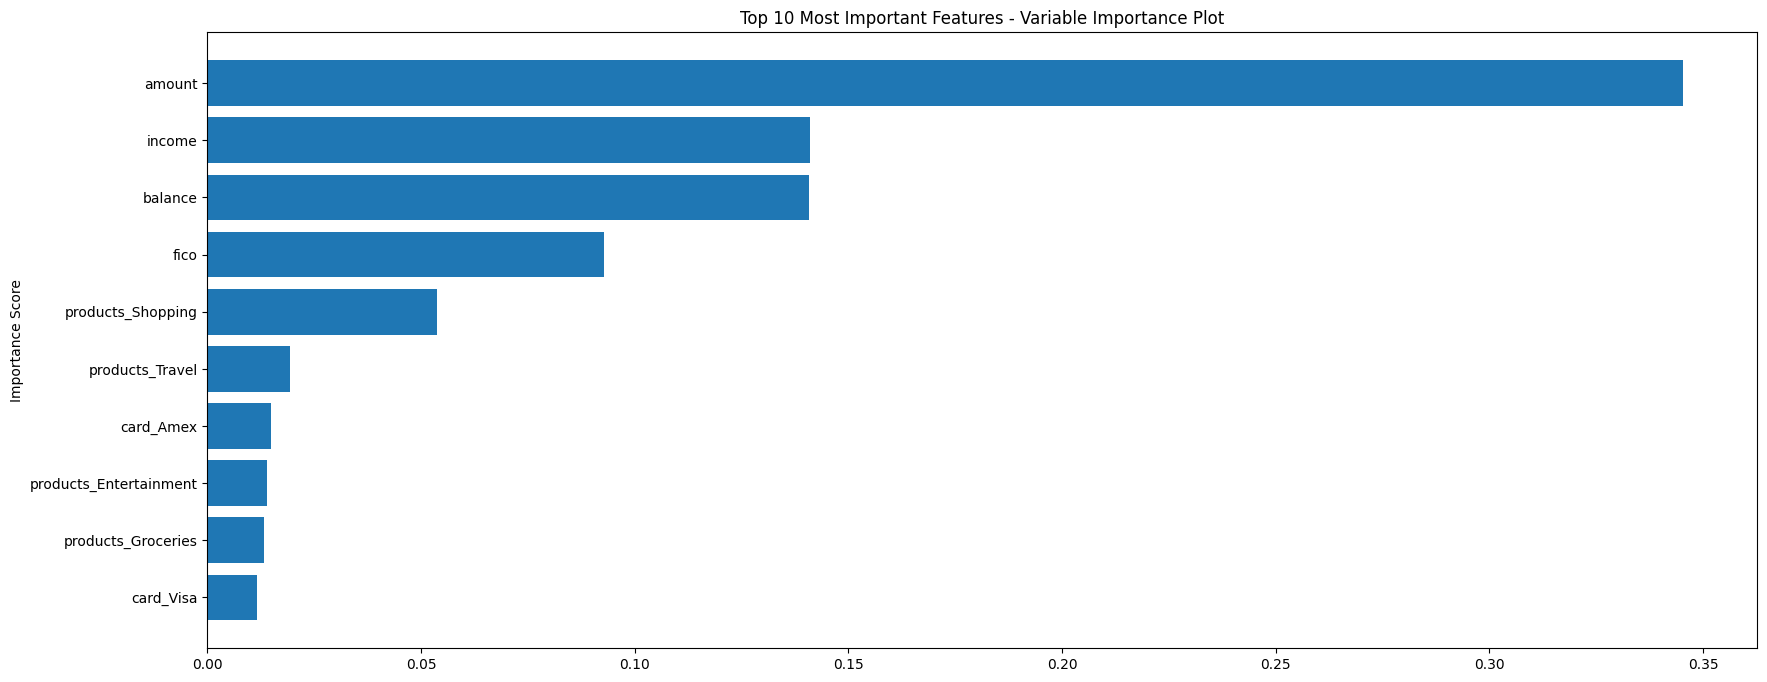

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
top_10_indices = np.argsort(feature_importances)[::-1][:10]
plt.figure(figsize=(20, 8))
plt.barh(X.columns[top_10_indices], feature_importances[top_10_indices])
plt.title('Top 10 Most Important Features - Variable Importance Plot')
plt.ylabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

### KNN

In [ ]:
X_train.columns

Index(['amount', 'fico', 'balance', 'income', 'products_Dining',
       'products_Entertainment', 'products_Groceries', 'products_Shopping',
       'products_Travel', 'US_False', 'US_True', 'card_Amex', 'card_Visa',
       'card_Mastercard', 'card_Discover', 'state_AL', 'state_AZ', 'state_AK',
       'state_AR', 'state_CA', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [ ]:
cont = ['amount', 'fico', 'balance', 'income']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_train_scaled = X_train
X_test_scaled = X_test

scaler = StandardScaler()
X_train_scaled[cont] = scaler.fit_transform(X_train[cont])
X_test_scaled[cont] = scaler.transform(X_test[cont])

In [ ]:
param_grid = {
    'n_neighbors': [1, 25, 50, 75, 100, 110, 115]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

y_test_pred_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)

print("ROC AUC Score with Best Parameters:", roc_auc_knn)

Best parameters: {'n_neighbors': 110}
ROC AUC Score with Best Parameters: 0.8272333149795692


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

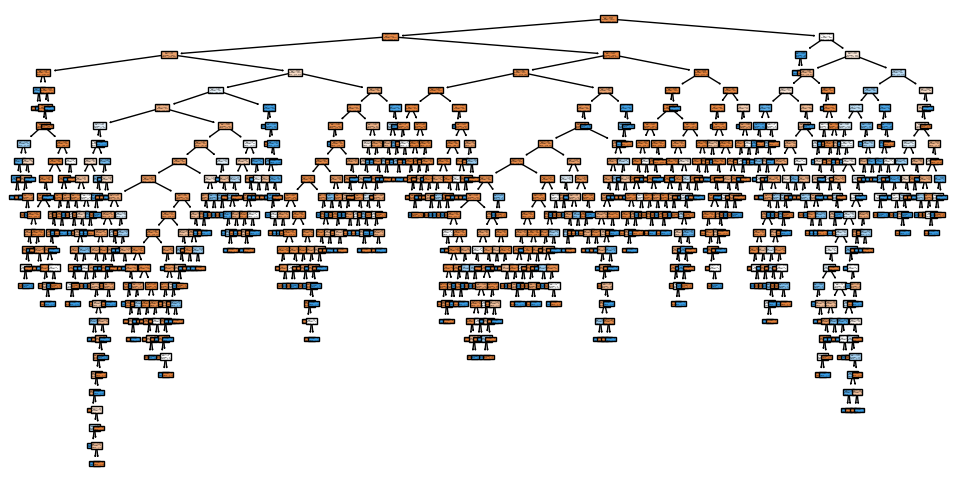

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(tree1, filled=True)
plt.show()

In [ ]:
y_pred = tree1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9475381008206331
Precision: 0.9472791191207107
Recall: 0.9475381008206331


In [ ]:
y_test_pred_dt = tree1.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome only

roc_auc_dt = roc_auc_score(y_test, y_test_pred_dt)
roc_auc_dt

0.8205193149216101

In [ ]:
tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=150, max_depth = 6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=150)

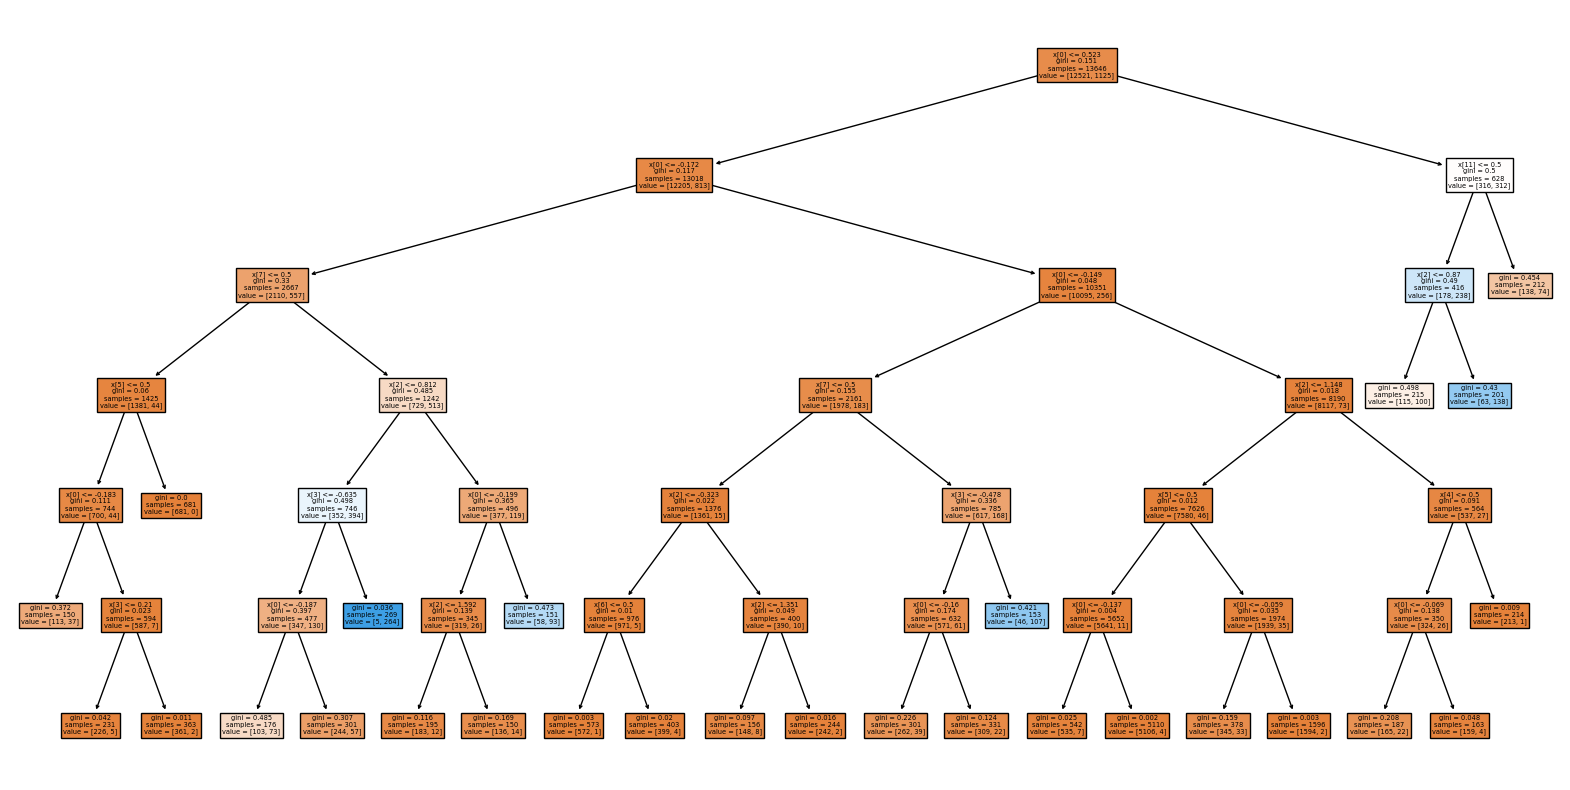

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
plot_tree(tree, filled=True)
plt.show()

In [ ]:
y_test_pred_dt = tree.predict_proba(X_test)[:, 1]  #probabilities for the positive outcome only

# Compute the ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_test_pred_dt)
roc_auc_dt

0.9594661952647289

In [ ]:
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9495896834701055
Precision: 0.9447919087038283
Recall: 0.9495896834701055


<ipython-input-176-d7ee37e771d0>:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


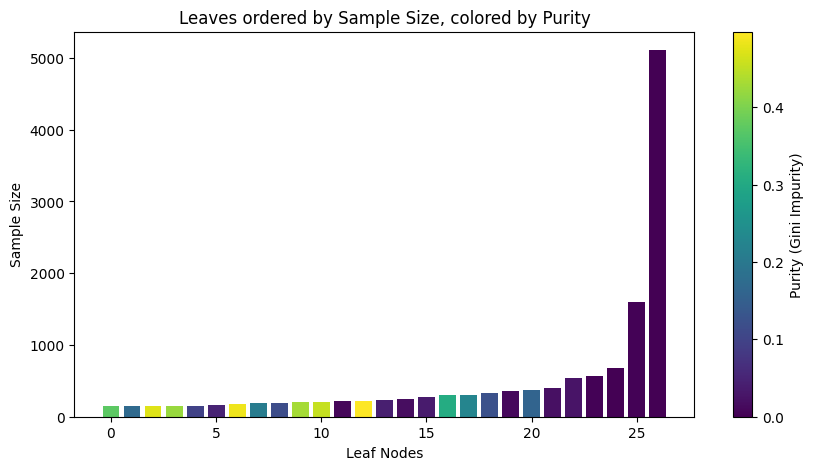

In [ ]:
def extract_leaf_info(tree):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    impurity = tree.tree_.impurity
    n_node_samples = tree.tree_.n_node_samples

    leaf_info = []

    for node in range(n_nodes):
        if children_left[node] == children_right[node]:
            leaf_info.append({'purity': impurity[node], 'samples': n_node_samples[node]})

    return pd.DataFrame(leaf_info)

# purity and sample size
leaf_df = extract_leaf_info(tree)
sorted_by_samples = leaf_df.sort_values('samples')

plt.figure(figsize=(10, 5))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(leaf_df['purity']), vmax=max(leaf_df['purity'])))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Purity (Gini Impurity)')
plt.bar(range(len(sorted_by_samples)), sorted_by_samples['samples'], color=sm.to_rgba(sorted_by_samples['purity']))
plt.title('Leaves ordered by Sample Size, colored by Purity')
plt.xlabel('Leaf Nodes')
plt.ylabel('Sample Size')
plt.show()

### **Lasso Classification**

Hyperparameter tune with LogisticRegression and GridsearchCV OR use LogisticRegressionCV


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

logreg_cv = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=5, penalty='l1', solver='liblinear')
logreg_cv.fit(X_train_scaled, y_train)

best_C = logreg_cv.C_
y_test_pred_lasso = logreg_cv.predict_proba(X_test_scaled)[:,1]


In [ ]:
roc_auc_lasso = roc_auc_score(y_test, y_test_pred_lasso)
print("ROC AUC Score:", roc_auc_lasso)

ROC AUC Score: 0.8302303880372097


### Model Comparision

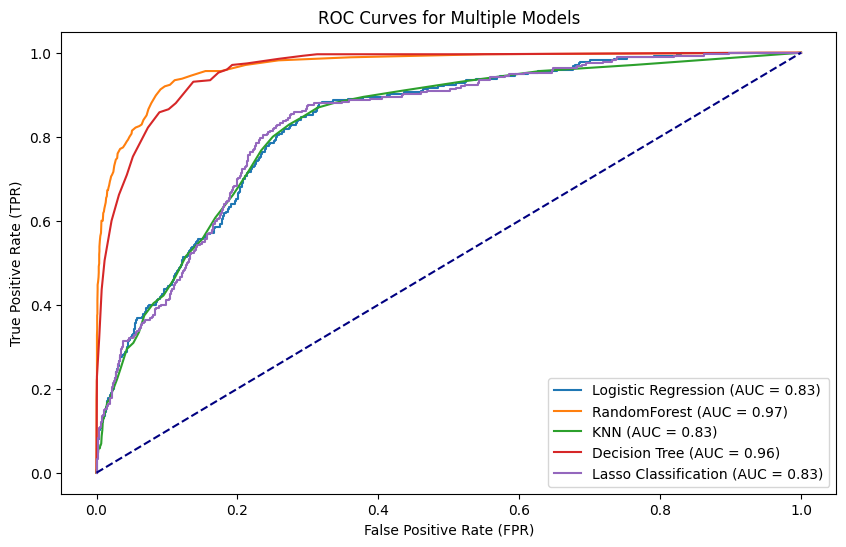

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, _ = roc_curve(y_test, y_test_pred_lr)
fpr_2, tpr_2, _ = roc_curve(y_test, y_test_pred_rf)
fpr_3, tpr_3, _ = roc_curve(y_test, y_test_pred_knn)
fpr_4, tpr_4, _ = roc_curve(y_test, y_test_pred_dt)
fpr_5, tpr_5, _ = roc_curve(y_test, y_test_pred_lasso)

roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)
roc_auc_3 = auc(fpr_3, tpr_3)
roc_auc_4 = auc(fpr_4, tpr_4)
roc_auc_5 = auc(fpr_5, tpr_5)

plt.figure(figsize=(10, 6))

plt.plot(fpr_1, tpr_1, label=f'Logistic Regression (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, label=f'RandomForest (AUC = {roc_auc_2:.2f})')
plt.plot(fpr_3, tpr_3, label=f'KNN (AUC = {roc_auc_3:.2f})')
plt.plot(fpr_4, tpr_4, label=f'Decision Tree (AUC = {roc_auc_4:.2f})')
plt.plot(fpr_5, tpr_5, label=f'Lasso Classification (AUC = {roc_auc_5:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc="lower right")
plt.show()
